# NoteBook Imports

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [3]:

TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

# Load the Data

In [4]:
# Features 
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter = ' ')
# Target 
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter = ' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter = ' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter = ' ')
prob_token_all = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter = ' ')


# Calculating the Joint Probability 

In [5]:
print("Shape of the dot product is ", X_test.dot(prob_token_spam).shape)

Shape of the dot product is  (1724,)


## Set the prior

$$ P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)} $$

In [6]:
np.log(prob_token_spam)

array([ -4.40758635,  -5.25366116,  -4.9900636 , ...,  -9.26099434,
        -9.38615749, -11.40106051])

## Joint Probability in log format

In [7]:
PROB_SPAM = 0.3116
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_token_all)) + np.log(PROB_SPAM)

In [8]:
joint_log_spam[:5]

array([24.28503374,  2.16337174, 20.59393467, 17.76031032, 20.51592245])

In [9]:
PROB_HAM = 1 - PROB_SPAM;
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_token_all)) + np.log(PROB_HAM)

In [10]:
joint_log_ham.size

1724

# Making Predictions 
### Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<center> <b>OR</b> </center>
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [11]:
prediction = joint_log_spam > joint_log_ham

In [12]:
prediction[-5:]

array([ True, False, False, False, False])

In [13]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

In [14]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(PROB_HAM)

# Metrics and Evaluation
## Accuracy

In [15]:
correct_doc = (y_test == prediction).sum()
print('Docs Classified Correctly', correct_doc)
numdocs_wrong = X_test.shape[0] - correct_doc
print('Docs Classified Incorrectly', numdocs_wrong)

Docs Classified Correctly 1685
Docs Classified Incorrectly 39


In [16]:
# Accuracy
correct_doc/len(X_test)

0.9773781902552204

In [17]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 2.26%
Accuracy of the model is 97.74%


## Visualizing the results

In [18]:
#Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start = -14000, stop = 1,num = 1000)

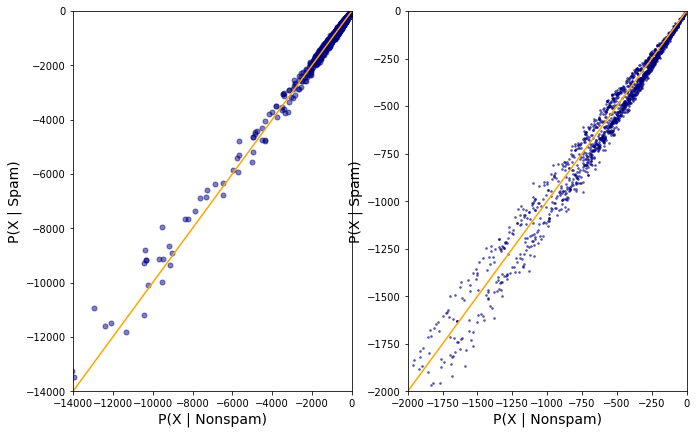

In [19]:
plt.figure(figsize = (11,7))

#Chart No - 1
plt.subplot(1,2,1)
plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

#Set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color = 'navy', alpha = 0.5, s = 25)
plt.plot(linedata, linedata, color = 'orange')

#Chart No - 2
plt.subplot(1,2,2)

plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

#Set scale
plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.scatter(joint_log_ham, joint_log_spam, color = 'navy', alpha = 0.5, s = 3)
plt.plot(linedata, linedata, color = 'orange')

plt.show()

In [20]:
# Chart Styling 
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test})

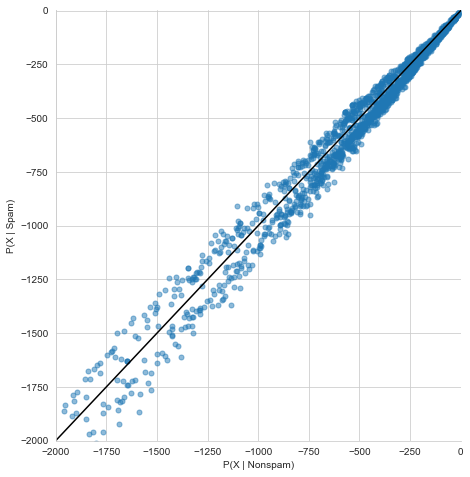

In [21]:
sns.lmplot(x = xaxis_label, y = yaxis_label, data = summary_df, height = 6.5, fit_reg = False, 
           scatter_kws = {'alpha':0.5, 's': 25})
plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.plot(linedata, linedata, color='black')

plt.show()

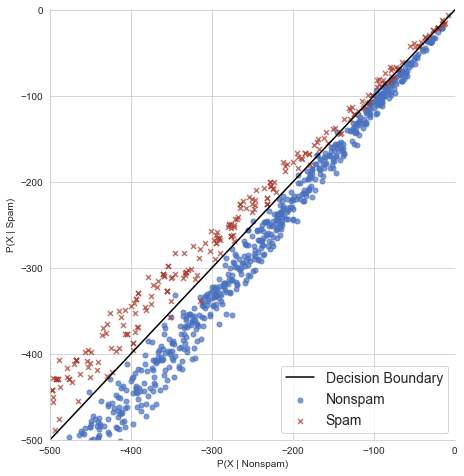

In [22]:
my_colors = ['#4A71C0','#AB3A2C']

sns.lmplot(x = xaxis_label, y = yaxis_label, data = summary_df, height = 6.5, fit_reg = False, legend = False, 
           scatter_kws = {'alpha':0.7, 's': 25}, hue = labels, markers = ['o', 'x'], palette = my_colors)
plt.xlim([-500,1])
plt.ylim([-500,1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc = 'lower right', fontsize = 14)

plt.show()

## False Positives and False Negative

In [23]:
np.unique(prediction, return_counts = True)

(array([False,  True]), array([1136,  588], dtype=int64))

In [24]:
true_pos = (y_test == 1) & (prediction == 1) #Single & is bitwise AND but &&- boolean AND

In [25]:
true_pos.sum()

569

In [26]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

19

In [30]:
false_neg = (y_test == 1) & (prediction == 0) 
false_neg.sum()

20

# Recall Score

In [32]:
recall_score = (true_pos.sum()) / (true_pos.sum() + false_neg.sum())
print('The Recall Score is {:.2%}'.format(recall_score))

The Recall Score is 96.60%


In [35]:
precision_metric = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision -> {:.3}'.format(precision_metric))

Precision -> 0.968


## F-Score or F1 Score 
$$F1-Score = 2 * \frac{Precision * Recall}{Precision + Recall} $$

In [40]:
f1_score = 2 * (precision_metric * recall_score)/(precision_metric + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.97
